In [1]:
%matplotlib inline
import matplotlib.pyplot as pl
import numpy as np
from datetime import datetime,timedelta

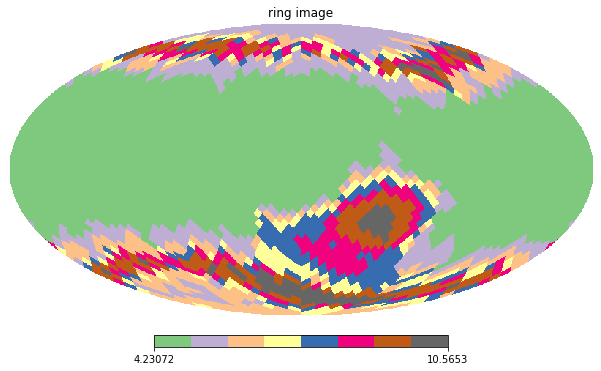

In [5]:
import sys
#sys.path.append("/home/limu/Code/Monty/")
import healpy as hp
from healpy.newvisufunc import projview, newprojplot
back=np.loadtxt("/home/limu/Documents/Space/GRBalpha/pict/healpix-background_4.txt").T
hp.mollview(np.log(back[-1]),title="ring image",nest=True,cmap=pl.cm.Accent)

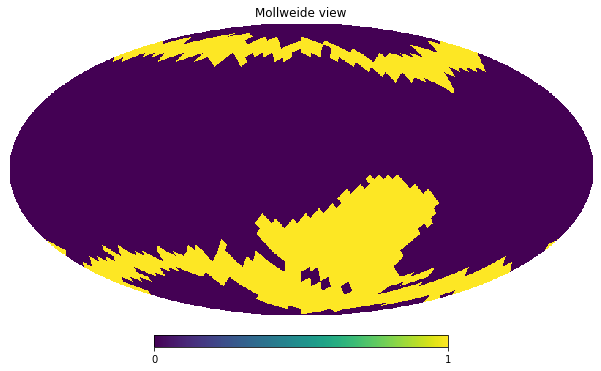

In [6]:
hp.mollview(np.log(back[-1])>7,nest=True)

In [43]:
px=hp.ang2pix(16,np.deg2rad(10),np.deg2rad(40),nest=True)
max(back[3])

38767.3

In [46]:
#TLE from /space/vzlusat2/processed_data/IDL/Data_firmware_initial/IDL_code/pypredict/20220314/tle.txt
pars=['latitude','longitude','elevation','azimuth','epoch']
expars=lambda v:[v[p] for p in pars]

import predict
tle=open("/home/limu/Space/pos/tle_vzlu_220314.txt").read().strip()
now=datetime.now()
qth_kos=[48.7408, -21.2284, 380]
vpass=np.array([expars(predict.observe(tle,qth_kos,(now+timedelta(0,20*i)).timestamp())) for i in range(1000)])

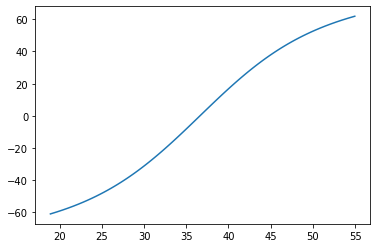

In [32]:
vpass=np.array(vpass)
pl.plot(vpass[:,1],vpass[:,0])

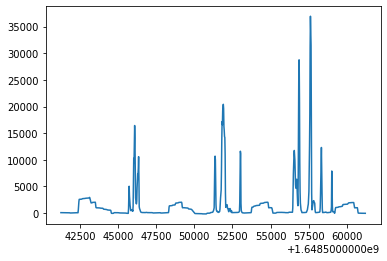

In [47]:
#pixs=[hp.ang2pix(16,np.deg2rad(p[1]),np.deg2rad(p[0]),nest=True) for p in vpass]
vals=[hp.pixelfunc.get_interp_val(back,p[1],p[0],nest=True,lonlat=True) for p in vpass]
#vals=[back[3][p] for p in pixs]
pl.plot(vpass[:,-1],vals)

In [37]:
hp.pixelfunc.get_interp_val(back,vpass[:,1],vpass[:,0],nest=True,lonlat=True)

array([861.09984056, 837.22323293, 810.46232763, 800.73038708,
       797.31506033, 795.54825776, 793.25653258, 790.9014668 ,
       788.26709097, 783.1676717 , 776.26316284, 773.77851938,
       772.62576748, 730.21382288, 678.71001756, 585.51827464,
       488.24666113, 384.62525611, 277.41873911, 253.2921511 ,
       252.09322381, 249.02337111, 246.09456134, 243.64165831,
       239.71383333, 233.17753443, 228.48998154, 224.53759778,
       215.26729783, 205.64417703, 202.46392361, 192.15561532,
       168.24937136, 154.81783718, 151.23204807, 148.31864208,
       145.87824613, 134.52460506, 104.17068248,  62.09466311,
        48.35117772,  44.253873  ,  41.05073063,  37.51833747,
        34.40812819,  75.91640645, 118.63516482, 119.64450248,
       119.14911934, 118.65432932, 118.15981936, 117.66528045,
       117.17040349, 116.67487515, 116.17838264, 112.25135305,
        87.59296697,  29.94941469,  -9.77973055, -26.00795988,
       -28.7642147 , -31.58070895, -34.46860339, -37.44

/tmp/ipykernel_349560/3438129324.py:10: RuntimeWarning: invalid value encountered in log
  m.pcolor(x,y,np.log(vals))


ValueError: not enough values to unpack (expected 2, got 1)

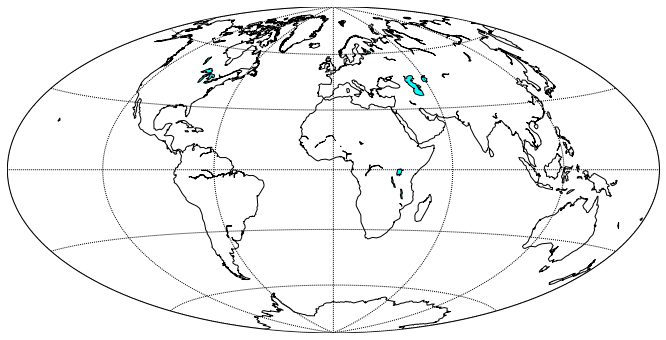

In [49]:
from mpl_toolkits.basemap import Basemap
pl.figure(figsize=(12,6))
m = Basemap(projection='hammer',lon_0=0,resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,420.,60.))

ok=m.fillcontinents(color='white',lake_color='aqua')
x,y=m(vpass[:,1],vpass[:,0])
m.pcolor(x,y,np.log(vals))

/tmp/ipykernel_349560/3640693164.py:2: RuntimeWarning: invalid value encountered in log
  pl.pcolor(vpass[:,1],vpass[:,0],[np.log(vals),vpass[-1]-t0])
/usr/local/lib64/python3.10/site-packages/matplotlib/axes/_axes.py:5532: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  C = np.asanyarray(args[2])


ValueError: not enough values to unpack (expected 2, got 1)

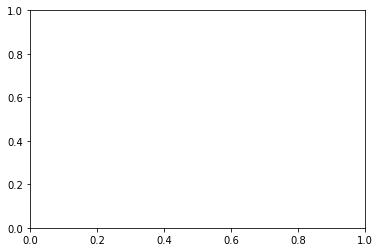

In [53]:
t0=vpass[-1][0]
pl.pcolor(vpass[:,1],vpass[:,0],[np.log(vals),vpass[-1]-t0])

In [54]:
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
dydx=np.log(vals)

norm = pl.Normalize(dydx.min(), dydx.max())
lc = LineCollection(segments, cmap='viridis', norm=norm)